## scikit-learn: machine learning in Python (https://scikit-learn.org/stable/)

In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Comparing classification models

In [3]:
X = tips.drop("sex", axis = 1)
y = tips["sex"]

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

y = lb.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(y_test)

[1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1]


In [4]:
from sklearn.svm import SVC
clf1 = SVC(gamma="auto")
clf1.fit(X_train, y_train)

SVC(gamma='auto')

In [5]:
pred1 = clf1.predict(X_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
pred2 = clf2.predict(X_test)
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1])

Classification metrics available in Scikt-learn:

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc1 = accuracy_score(pred1, y_test)
acc2 = accuracy_score(pred2, y_test)
print("SVC Accuracy: {}; KNN Accuracy: {}\n".format(acc1, acc2))

# clr1 = classification_report(pred1, y_test)
# clr2 = classification_report(pred2, y_test)
# print("SVC Report: {}".format(clr1))
# print("KNN Report: {}".format(clr2))

cmat1 = confusion_matrix(pred1, y_test)
cmat2 = confusion_matrix(pred2, y_test)
print("Confusion Matrix format:\n[[True positive False positive]\n[False negative True negative]]\n")
print("SVC Matrix: \n{}\n".format(cmat1))
print("KNN Matrix: \n{}\n".format(cmat2))

SVC Accuracy: 0.7027027027027027; KNN Accuracy: 0.6756756756756757

Confusion Matrix format:
[[True positive False positive]
[False negative True negative]]

SVC Matrix: 
[[ 5  1]
 [21 47]]

KNN Matrix: 
[[ 6  4]
 [20 44]]



### Comparing regression models

#### Most common regression metrics
##### Mean Absolute Error (MAE)

$MAE=\frac{1}{n}\sum\limits^{n}_{i=1}|y_i - \hat{y}_i|$

##### Mean Square Error (MSE)

$MSE=\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2$

##### Root Mean Square Error (RMSE)

$RMSE=\sqrt{\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2}$

##### R^2 Score (Coefficient of determination)

From scikit: "Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0."

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [24]:
X = tips.drop('tip', axis = 1)
y = tips['tip']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [25]:
from sklearn.svm import LinearSVR 
mdl_1 = LinearSVR(random_state=0, tol=1e-5)
mdl_1.fit(X_train, y_train)

y_pred_1 = mdl_1.predict(X_test)

ValueError: could not convert string to float: 'Male'

In [26]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.svm import LinearSVR 
mdl_1 = LinearSVR(random_state=0, tol=1e-5)
mdl_1.fit(X_train, y_train)

y_pred_1 = mdl_1.predict(X_test)

/Users/lucasharada/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [28]:
from sklearn.ensemble import RandomForestRegressor
mdl_2 = RandomForestRegressor(max_depth = 2, random_state = 0)
mdl_2.fit(X_train, y_train)

y_pred_2 = mdl_2.predict(X_test)

In [29]:
from sklearn.linear_model import Lasso
mdl_mvt = Lasso(alpha=0.02)
mdl_mvt.fit(X_train, y_train)

y_pred_mvt = mdl_mvt.predict(X_test)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
mdl_abcr = KNeighborsRegressor(n_neighbors = 10)
mdl_abcr.fit(X_train, y_train)

y_pred_abcr = mdl_abcr.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = [
    [mean_absolute_error(y_test, y_pred_1), mean_squared_error(y_test, y_pred_1), np.sqrt(mean_squared_error(y_test, y_pred_1)), r2_score(y_test, y_pred_1)],
    [mean_absolute_error(y_test, y_pred_2), mean_squared_error(y_test, y_pred_2), np.sqrt(mean_squared_error(y_test, y_pred_2)), r2_score(y_test, y_pred_2)],
    [mean_absolute_error(y_test, y_pred_abcr), mean_squared_error(y_test, y_pred_abcr), np.sqrt(mean_squared_error(y_test, y_pred_abcr)), r2_score(y_test, y_pred_abcr)],
    [mean_absolute_error(y_test, y_pred_mvt), mean_squared_error(y_test, y_pred_mvt), np.sqrt(mean_squared_error(y_test, y_pred_mvt)), r2_score(y_test, y_pred_mvt)],
]

Text(0, 0.5, 'R2')

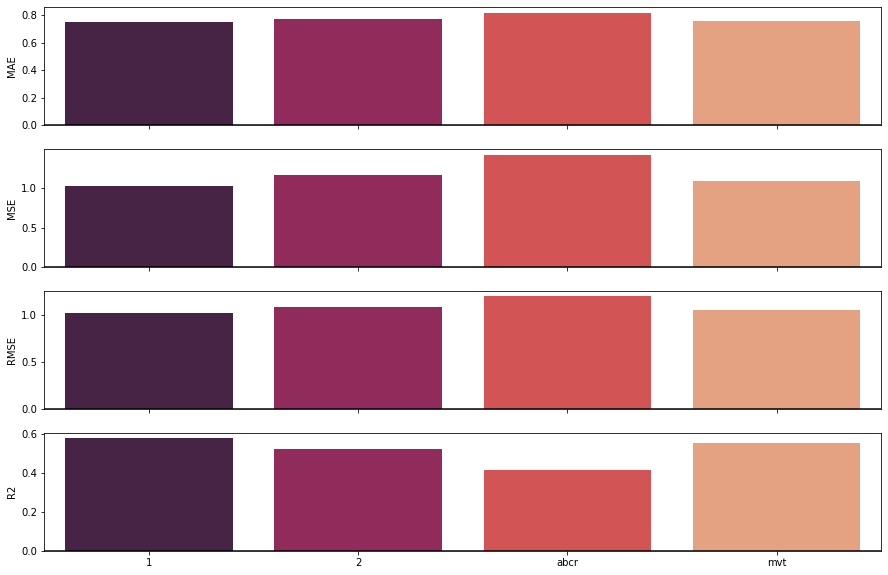

In [32]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

x = np.array(['1', '2', 'abcr', 'mvt'])
sns.barplot(x = x, y = list(map(lambda r: r[0], results)), palette="rocket", ax = ax1)
sns.barplot(x = x, y = list(map(lambda r: r[1], results)), palette="rocket", ax = ax2)
sns.barplot(x = x, y = list(map(lambda r: r[2], results)), palette="rocket", ax = ax3)
sns.barplot(x = x, y = list(map(lambda r: r[3], results)), palette="rocket", ax = ax4)
ax1.axhline(0, color="k")
ax1.set_ylabel("MAE")
ax2.axhline(0, color="k")
ax2.set_ylabel("MSE")
ax3.axhline(0, color="k")
ax3.set_ylabel("RMSE")
ax4.axhline(0, color="k")
ax4.set_ylabel("R2")

### Finding optimal parameters

In [33]:
from sklearn.neighbors import KNeighborsRegressor
ks = np.arange(1,51)
results = np.zeros(50)
for k in ks:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results[k-1] = np.sqrt(mean_squared_error(y_test, y_pred))
best_k = results.argmin() + 1
low_rmse = results.min()
print ("Best number of neighbors is {} with RMSE equals to {}".format(best_k, low_rmse))    

Best number of neighbors is 21 with RMSE equals to 1.149155019699308


Text(0.5, 1.0, 'RMSE vs Number of neighbors')

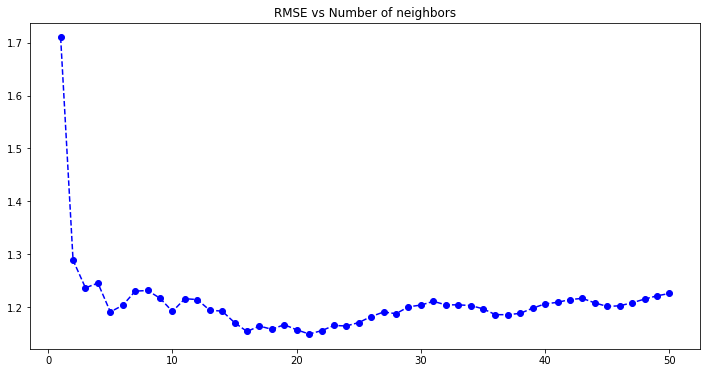

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(ks, results, marker='o', linestyle='--', color='blue')
plt.title("RMSE vs Number of neighbors")

#### Cross-validation - http://scikit-learn.org/stable/modules/model_evaluation.html

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': list(range(1, 51))}
knn = KNeighborsRegressor()
grid = GridSearchCV(
    knn,
    parameters,
    cv = 10,
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    refit = True
)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.cv_results_)

{'n_neighbors': 27}
{'mean_fit_time': array([0.00641832, 0.00379329, 0.00593531, 0.00827668, 0.003052  ,
       0.00260072, 0.01541798, 0.0060281 , 0.00616269, 0.00281289,
       0.00723555, 0.01530168, 0.00225711, 0.00438187, 0.00247025,
       0.00252311, 0.00245228, 0.0071945 , 0.00734818, 0.00514295,
       0.00503075, 0.00658205, 0.00642433, 0.00231419, 0.00702906,
       0.00611401, 0.00509794, 0.0044868 , 0.00283489, 0.00224168,
       0.00252988, 0.00375564, 0.00584705, 0.0024111 , 0.00460324,
       0.00810666, 0.00678127, 0.00350475, 0.00232487, 0.00644908,
       0.00471098, 0.00779974, 0.00245831, 0.00263309, 0.00194623,
       0.00607541, 0.00220947, 0.00237443, 0.00234859, 0.0018954 ]), 'std_fit_time': array([0.01051945, 0.00304702, 0.01088469, 0.01144812, 0.00156832,
       0.00116772, 0.0310465 , 0.00784069, 0.0098217 , 0.00069081,
       0.009904  , 0.0303237 , 0.00121302, 0.00675141, 0.00051874,
       0.00050903, 0.00058855, 0.00929562, 0.00938778, 0.00582965,
      

In [ ]:
# Training errors
mean_cv_train = grid.cv_results_['mean_train_score']
rmse_cv_train = np.sqrt(np.abs(mean_cv_train))

# Test errors
mean_cv_test = grid.cv_results_['mean_test_score']
rmse_cv_test = np.sqrt(np.abs(mean_cv_test))

# Plotting
plt.figure(figsize=(12,6))
plt.plot(rmse_cv_train, marker = 'o', linestyle = '--', color = 'red')
plt.plot(rmse_cv_test, marker = 'o', linestyle = '--', color = 'green')
plt.legend(['Train', 'Test'], loc = (0.8, 0.2))
plt.title("Cross validation RMSE vs Number of neighbors")
plt.xlabel('Number of neighbors')
plt.ylabel('RMSE 10-CV')

In [ ]:
best_knn = grid.best_estimator_
best_pred = best_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, best_pred))

In [ ]:
from sklearn.model_selection import RepeatedKFold

parameters = {'n_neighbors': list(range(1, 41))}
knn = KNeighborsRegressor()
grid = GridSearchCV(
    knn,
    parameters,
    cv = RepeatedKFold(n_splits = 10, n_repeats = 30),
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    refit = True
)
grid.fit(X_train, y_train)
grid.best_params_
# grid.cv_results_